In [1]:
import argparse
import copy
import re
import os
from time import gmtime, strftime
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import matplotlib
import matplotlib.patches as patches
import math
from scipy.stats.mstats import mquantiles
from random import randint
from sklearn.metrics.cluster import adjusted_rand_score
from scipy import stats
from matplotlib import cm
import pandas as pd
import math
import scipy
%matplotlib inline
import numpy as np

from genomedisco import data_operations, processing, visualization
from genomedisco.comparison_types.disco_random_walks import DiscoRandomWalks
from genomedisco.comparison_types.disco_random_walks_binarized_matrices import DiscoRandomWalks_binarizedMatrices


/srv/gsfs0/projects/snyder/oursu/software/anaconda2/mypython/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
node_file='/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/nodes/nodes.chr18.gz'
nodes,nodes_idx=processing.read_nodes_from_bed(node_file)

GenomeDISCO | Fri Aug 25 13:07:15 2017 | processing: Loading genomic regions from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/nodes/nodes.chr18.gz
num nodes
1952


In [3]:
def process_stuff(m1name,m2name,nodes,args_m_subsample='lowest',norm='uniform'):    
    
    m1file='/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/'+m1name+'/'+m1name+'.chr18.gz'
    m2file='/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/'+m2name+'/'+m2name+'.chr18.gz'
    m1=processing.construct_csr_matrix_from_data_and_nodes(m1file,nodes,True)
    m2=processing.construct_csr_matrix_from_data_and_nodes(m2file,nodes,True)

    stats={}
    stats[m1name]={}
    stats[m2name]={}
    stats[m1name]['depth']=m1.sum()
    stats[m2name]['depth']=m2.sum()

    m1_subsample=copy.deepcopy(m1)
    m2_subsample=copy.deepcopy(m2)
    
    if args_m_subsample!='NA':
        if args_m_subsample=='lowest':
            if stats[m1name]['depth']>stats[m2name]['depth']:
                m_subsample=copy.deepcopy(m2)
            if stats[m1name]['depth']<stats[m2name]['depth']:
                m_subsample=copy.deepcopy(m1)

        print "GenomeDISCO | "+strftime("%c")+" | Subsampling depth = "+str(m_subsample.sum())
        desired_depth=m_subsample.sum()                                                                               
        if m1.sum()>desired_depth:
            m1_subsample=data_operations.subsample_to_depth(m1,desired_depth)
        if m2.sum()>desired_depth:
            m2_subsample=data_operations.subsample_to_depth(m2,desired_depth)
    
    stats[m1name]['subsampled_depth']=m1_subsample.sum()   
    stats[m2name]['subsampled_depth']=m2_subsample.sum()

    print "GenomeDISCO | "+strftime("%c")+'| main: Normalizing with '+norm
    m1_norm=data_operations.process_matrix(m1_subsample,norm)
    m2_norm=data_operations.process_matrix(m2_subsample,norm)
    
    return m1_norm,m2_norm

def get_sqrtvc(m):
    rowsums=m.sum(axis=1)
    sqrt_rowsums=np.sqrt(rowsums)
    normed=np.zeros(m.shape)
    for r in range(m.shape[0]):
        if sqrt_rowsums[r]==0.0:
            continue
        normed[r,:]=1.0*m[r,:]/sqrt_rowsums[r]
    for r in range(m.shape[0]):
        if sqrt_rowsums[r]==0.0:
            continue
        normed[:,r]=1.0*normed[:,r]/sqrt_rowsums[r]
    plt.plot(normed.sum(axis=1))
    plt.show()
    return normed


In [ ]:
m1name='HIC014'
m2name='HIC022'
m1file='/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/'+m1name+'/'+m1name+'.chr18.gz'
m2file='/ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/'+m2name+'/'+m2name+'.chr18.gz'
m1=processing.construct_csr_matrix_from_data_and_nodes(m1file,nodes,True)
m2=processing.construct_csr_matrix_from_data_and_nodes(m2file,nodes,True)
m1_norm=data_operations.process_matrix(m1,'sqrtvc')
m2_norm=data_operations.process_matrix(m2,'sqrtvc')

GenomeDISCO | Fri Aug 25 13:13:18 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC014/HIC014.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Fri Aug 25 13:13:24 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC022/HIC022.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction


In [ ]:
plt.plot(m2_norm.sum(axis=1))
plt.show()

GenomeDISCO | Fri Aug 25 13:07:42 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC014/HIC014.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction


/srv/gsfs0/projects/snyder/oursu/software/anaconda2/mypython/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


GenomeDISCO | Fri Aug 25 13:07:47 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC022/HIC022.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Fri Aug 25 13:07:54 2017 | Subsampling depth = 1296155.0
GenomeDISCO | Fri Aug 25 13:08:18 2017| main: Normalizing with uniform


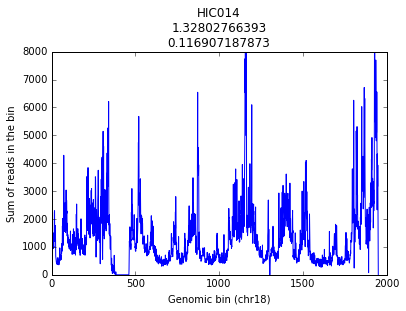

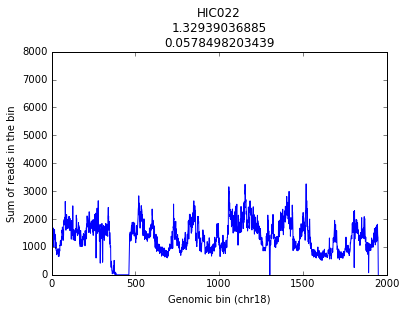

In [4]:
m1_m='HIC014'
m2_m='HIC022'

hic={}
hic_data=process_stuff(m1_m,m2_m,nodes)
hic[m1_m]=hic_data[0].toarray()
hic[m2_m]=hic_data[1].toarray()

for m in hic.keys():
    hic[m]=hic[m]+hic[m].transpose()
    
x=10
    

plt.plot(hic[m1_m].sum(axis=0))
covmean=np.mean(hic[m1_m].sum(axis=0))/1000
covvar=np.std(hic[m1_m].sum(axis=0))/10000
plt.title(m1_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

plt.plot(hic[m2_m].sum(axis=0))
covmean=np.mean(hic[m2_m].sum(axis=0))/1000
covvar=np.std(hic[m2_m].sum(axis=0))/10000
plt.title(m2_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

In [5]:
process_stuff(m1_m,m2_m,nodes,'lowest','sqrtvc')

GenomeDISCO | Fri Aug 25 13:09:04 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC014/HIC014.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Fri Aug 25 13:09:10 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC022/HIC022.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Fri Aug 25 13:09:18 2017 | Subsampling depth = 1296155.0
GenomeDISCO | Fri Aug 25 13:09:43 2017| main: Normalizing with sqrtvc


/srv/gsfs0/projects/snyder/oursu/software/anaconda2/mypython/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


(<1952x1952 sparse matrix of type '<type 'numpy.float64'>'
 	with 419935 stored elements in Compressed Sparse Row format>,
 <1952x1952 sparse matrix of type '<type 'numpy.float64'>'
 	with 414441 stored elements in Compressed Sparse Row format>)

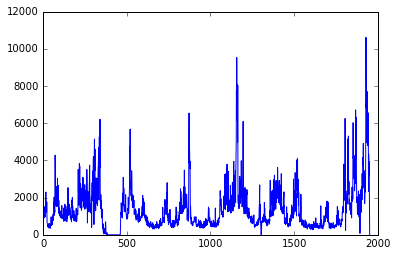

In [6]:
plt.plot(hic['HIC014'].sum(axis=1))
plt.show()

GenomeDISCO | Mon Jun  5 15:13:07 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC005/HIC005.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:13:16 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC014/HIC014.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:13:22 2017 | Subsampling depth = 1296155.0
GenomeDISCO | Mon Jun  5 15:13:52 2017| main: Normalizing with uniform


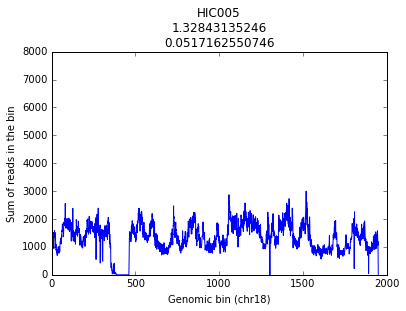

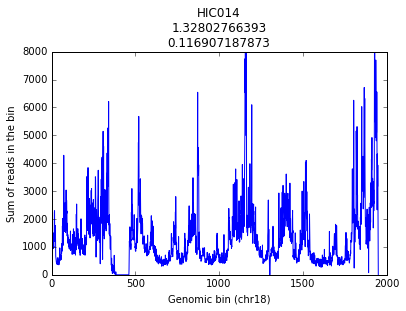

In [7]:
m1_m='HIC005'
m2_m='HIC014'

hic={}
hic_data=process_stuff(m1_m,m2_m,nodes)
hic[m1_m]=hic_data[0].toarray()
hic[m2_m]=hic_data[1].toarray()

for m in hic.keys():
    hic[m]=hic[m]+hic[m].transpose()
    
x=10
    

plt.plot(hic[m1_m].sum(axis=0))
covmean=np.mean(hic[m1_m].sum(axis=0))/1000
covvar=np.std(hic[m1_m].sum(axis=0))/10000
plt.title(m1_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

plt.plot(hic[m2_m].sum(axis=0))
covmean=np.mean(hic[m2_m].sum(axis=0))/1000
covvar=np.std(hic[m2_m].sum(axis=0))/10000
plt.title(m2_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

GenomeDISCO | Mon Jun  5 15:14:33 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC005/HIC005.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:14:42 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC012/HIC012.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:14:47 2017 | Subsampling depth = 923279.0
GenomeDISCO | Mon Jun  5 15:15:17 2017| main: Normalizing with uniform


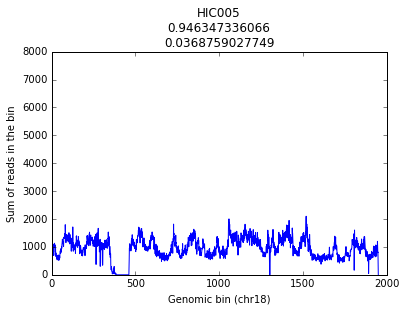

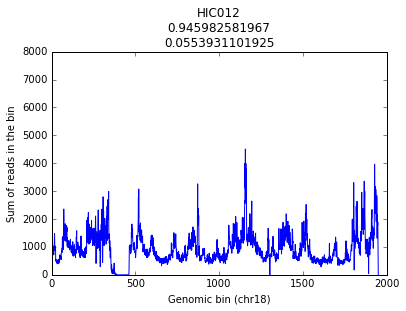

In [8]:
m1_m='HIC005'
m2_m='HIC012'

hic={}
hic_data=process_stuff(m1_m,m2_m,nodes)
hic[m1_m]=hic_data[0].toarray()
hic[m2_m]=hic_data[1].toarray()

for m in hic.keys():
    hic[m]=hic[m]+hic[m].transpose()
    
x=10
    

plt.plot(hic[m1_m].sum(axis=0))
covmean=np.mean(hic[m1_m].sum(axis=0))/1000
covvar=np.std(hic[m1_m].sum(axis=0))/10000
plt.title(m1_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

plt.plot(hic[m2_m].sum(axis=0))
covmean=np.mean(hic[m2_m].sum(axis=0))/1000
covvar=np.std(hic[m2_m].sum(axis=0))/10000
plt.title(m2_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

GenomeDISCO | Mon Jun  5 15:17:05 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC005/HIC005.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:17:14 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC015/HIC015.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:17:18 2017 | Subsampling depth = 684964.0
GenomeDISCO | Mon Jun  5 15:17:48 2017| main: Normalizing with uniform


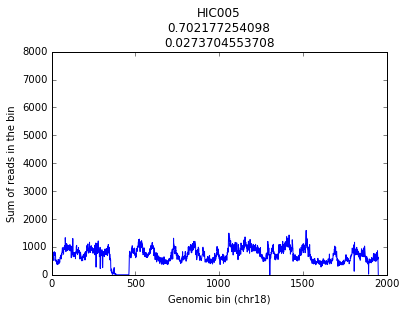

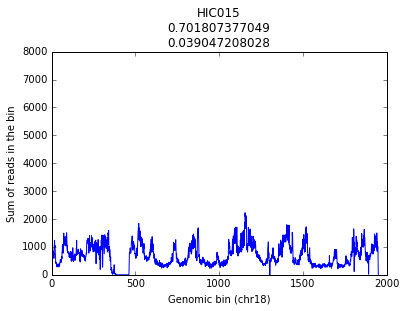

In [9]:
m1_m='HIC005'
m2_m='HIC015'

hic={}
hic_data=process_stuff(m1_m,m2_m,nodes)
hic[m1_m]=hic_data[0].toarray()
hic[m2_m]=hic_data[1].toarray()

for m in hic.keys():
    hic[m]=hic[m]+hic[m].transpose()
    
x=10
    

plt.plot(hic[m1_m].sum(axis=0))
covmean=np.mean(hic[m1_m].sum(axis=0))/1000
covvar=np.std(hic[m1_m].sum(axis=0))/10000
plt.title(m1_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

plt.plot(hic[m2_m].sum(axis=0))
covmean=np.mean(hic[m2_m].sum(axis=0))/1000
covvar=np.std(hic[m2_m].sum(axis=0))/10000
plt.title(m2_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

GenomeDISCO | Mon Jun  5 10:03:08 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC005/HIC005.chr18.gz
GenomeDISCO | Mon Jun  5 10:03:18 2017 | processing: =============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 10:03:18 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC016/HIC016.chr18.gz
GenomeDISCO | Mon Jun  5 10:03:22 2017 | processing: =============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 10:03:22 2017 | Subsampling depth = 680772.0
GenomeDISC

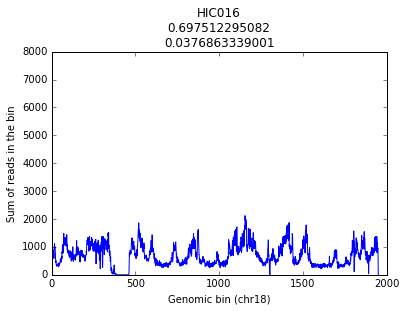

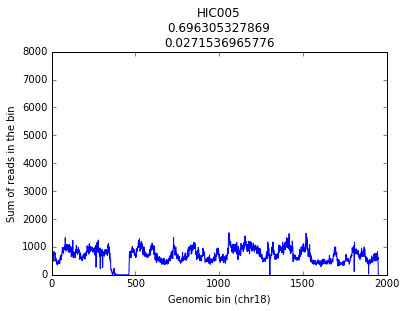

In [9]:
m1_m='HIC005'
m2_m='HIC016'

hic={}
hic_data=process_stuff(m1_m,m2_m,nodes)
hic[m1_m]=hic_data[0].toarray()
hic[m2_m]=hic_data[1].toarray()

for m in hic.keys():
    hic[m]=hic[m]+hic[m].transpose()
    
x=10
    

plt.plot(hic[m1_m].sum(axis=0))
covmean=np.mean(hic[m1_m].sum(axis=0))/1000
covvar=np.std(hic[m1_m].sum(axis=0))/10000
plt.title(m1_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

plt.plot(hic[m2_m].sum(axis=0))
covmean=np.mean(hic[m2_m].sum(axis=0))/1000
covvar=np.std(hic[m2_m].sum(axis=0))/10000
plt.title(m2_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

GenomeDISCO | Mon Jun  5 15:24:57 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC005/HIC005.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:25:06 2017 | processing: Loading interaction data from /ifs/scratch/oursu/3d/paper/2017-05-30/LA/reproducibility/data/edges/HIC022/HIC022.chr18.gz
=============== Warning: Your file contains duplicate interactions! Please ensure that each interaction is listed once, then re-run. In the meantime, we will run this analysis using the sum of all counts encountered per interaction
GenomeDISCO | Mon Jun  5 15:25:14 2017 | Subsampling depth = 2024537.0
GenomeDISCO | Mon Jun  5 15:25:44 2017| main: Normalizing with uniform


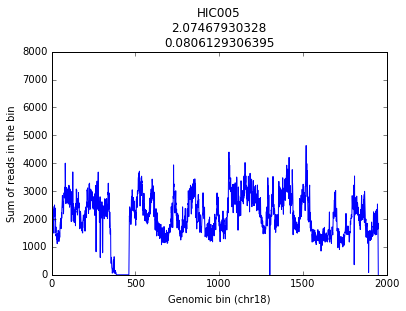

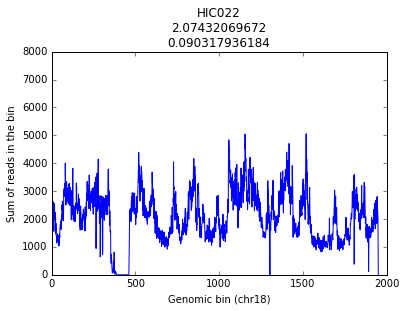

In [15]:
m1_m='HIC005'
m2_m='HIC022'

hic={}
hic_data=process_stuff(m1_m,m2_m,nodes)
hic[m1_m]=hic_data[0].toarray()
hic[m2_m]=hic_data[1].toarray()

for m in hic.keys():
    hic[m]=hic[m]+hic[m].transpose()
    
x=10
    

plt.plot(hic[m1_m].sum(axis=0))
covmean=np.mean(hic[m1_m].sum(axis=0))/1000
covvar=np.std(hic[m1_m].sum(axis=0))/10000
plt.title(m1_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()

plt.plot(hic[m2_m].sum(axis=0))
covmean=np.mean(hic[m2_m].sum(axis=0))/1000
covvar=np.std(hic[m2_m].sum(axis=0))/10000
plt.title(m2_m+'\n'+str(covmean)+'\n'+str(covvar))
plt.xlabel('Genomic bin (chr18)')
plt.ylabel('Sum of reads in the bin')
plt.ylim(0,8000)
plt.show()